In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('free_trial.csv')

In [3]:
df.head()

,username,trial_start_time,trial_end_time,is_banned,is_upgrade,upgrade_time,monthly_price,subscription_months,spam_score,trial_used_days,job_count,manual_jobs,auto_jobs,minutes
0,2,10/12/17 15:48,10/26/17 15:48,False,False,NaN,NaN,NaN,0.270446,4,677,5,672,148.316667
1,3,3/8/18 04:07,3/8/18 04:08,True,False,NaN,NaN,NaN,0.956969,1,1,1,0,1.066667
2,4,2/26/17 12:52,3/12/17 12:52,False,False,NaN,NaN,NaN,0.250976,1,1,1,0,11.466667
3,5,4/25/18 22:04,5/9/18 22:04,False,False,NaN,NaN,NaN,0.791360,1,5,5,0,48.983333
4,6,3/16/18 20:20,3/30/18 20:20,False,False,NaN,NaN,NaN,0.519702,1,6,6,0,83.383333


In [4]:
df.set_index('username', inplace=True)

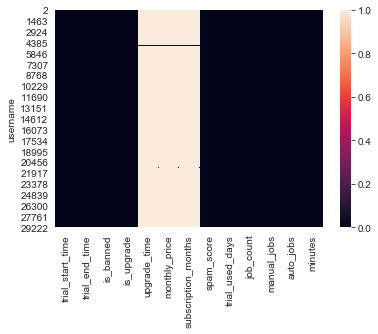

In [5]:
sns.heatmap(df.isnull())

In [6]:
df['trial_start_time'] = pd.to_datetime(df['trial_start_time'])
df['trial_end_time'] = pd.to_datetime(df['trial_end_time'])
df['upgrade_time'] = pd.to_datetime(df['upgrade_time'])

In [7]:
df['trial_period'] = (df['trial_end_time'] - df['trial_start_time']).apply(lambda x: int(str(x).split(' ')[0]))

In [8]:
df['is_upgrade'] = df['is_upgrade'].apply(lambda x: 1 if x else 0)

In [9]:
df.head()

,trial_start_time,trial_end_time,is_banned,is_upgrade,upgrade_time,monthly_price,subscription_months,spam_score,trial_used_days,job_count,manual_jobs,auto_jobs,minutes,trial_period
username,,,,,,,,,,,,,,
2,2017-10-12 15:48:00,2017-10-26 15:48:00,False,0,NaT,NaN,NaN,0.270446,4,677,5,672,148.316667,14
3,2018-03-08 04:07:00,2018-03-08 04:08:00,True,0,NaT,NaN,NaN,0.956969,1,1,1,0,1.066667,0
4,2017-02-26 12:52:00,2017-03-12 12:52:00,False,0,NaT,NaN,NaN,0.250976,1,1,1,0,11.466667,14
5,2018-04-25 22:04:00,2018-05-09 22:04:00,False,0,NaT,NaN,NaN,0.791360,1,5,5,0,48.983333,14
6,2018-03-16 20:20:00,2018-03-30 20:20:00,False,0,NaT,NaN,NaN,0.519702,1,6,6,0,83.383333,14


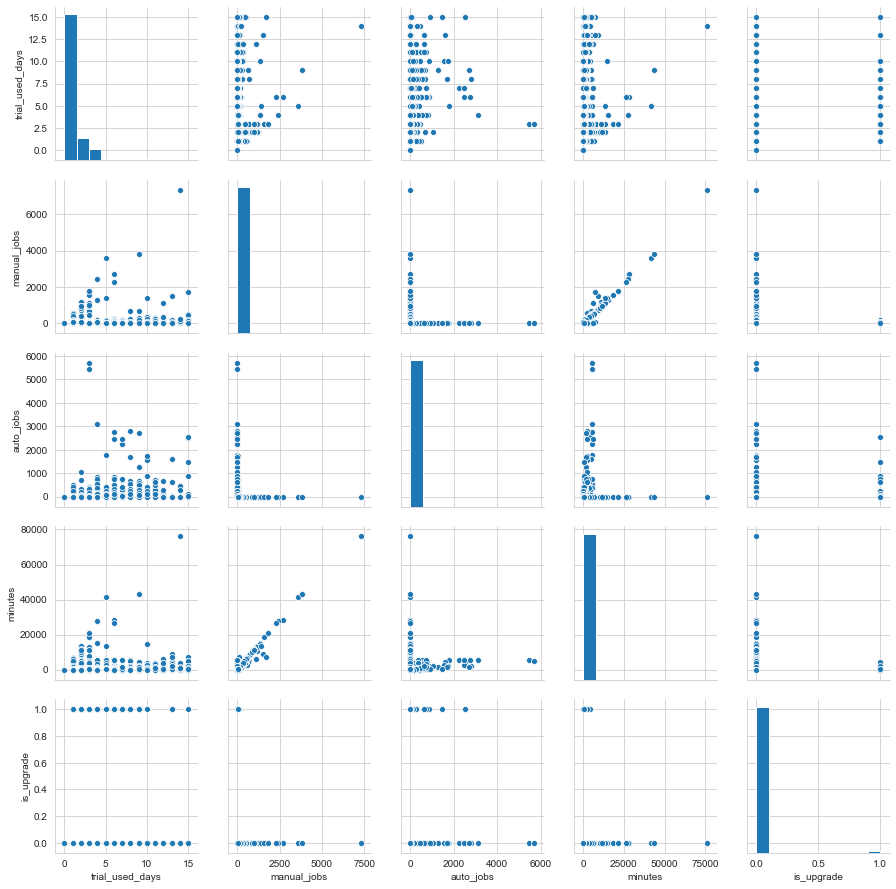

In [10]:
sns.pairplot(df[['trial_used_days','manual_jobs','auto_jobs','minutes','is_upgrade']])

In [11]:
def category_trials(days):
    if days >=1 and days <= 5:
        return 1
    elif days >=6 and days <= 10:
        return 2
    elif days <=15:
        return 3
    else:
        return days

In [12]:
df['trial_used_days_cat'] = df['trial_used_days'].apply(lambda x: category_trials(x))

In [13]:
def auto_jobs_percentage(cols):
    auto = cols[0]
    total = cols[1]
    
    if auto == 0:
        return 1

    percentage = auto/total

    if percentage <= 0.25:
        return 1
    elif percentage <=0.5:
        return 2
    elif percentage <= 0.75:
        return 3
    else:
        return 4
    


In [14]:
def manual_jobs_percentage(cols):
    manual = cols[0]
    total = cols[1]
    
    if auto == 0:
        return 1

    percentage = manual/total

    if percentage <= 0.25:
        return 1
    elif percentage <=0.5:
        return 2
    elif percentage <= 0.75:
        return 3
    else:
        return 4
    


In [44]:
df['auto_job_pct_cat'] = df[['auto_jobs', 'job_count']].apply(auto_jobs_percentage, axis=1)
df['manual_job_pct_cat'] = df[['manual_jobs', 'job_count']].apply(auto_jobs_percentage, axis=1)


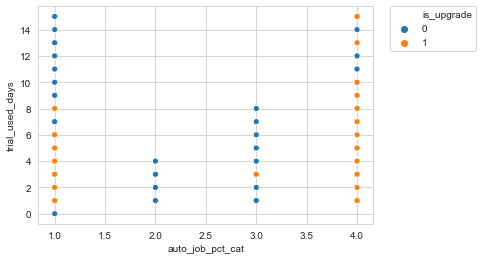

In [57]:
sns.scatterplot(x='auto_job_pct_cat', y='trial_used_days', data=df, hue='is_upgrade')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

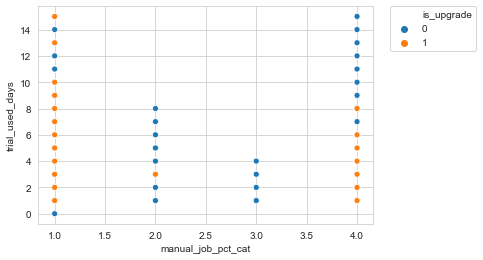

In [49]:
sns.scatterplot(x='manual_job_pct_cat', y='trial_used_days', data=df, hue='is_upgrade')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

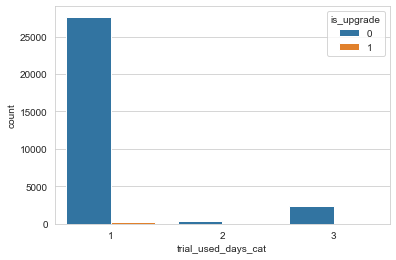

In [20]:
sns.countplot(x='trial_used_days_cat', data=df, hue='is_upgrade')

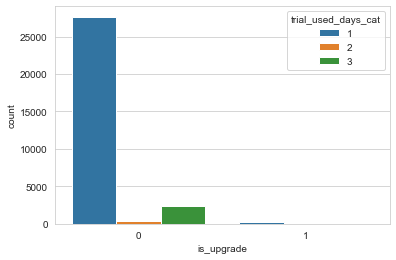

In [21]:
sns.countplot(x='is_upgrade', data=df, hue='trial_used_days_cat')

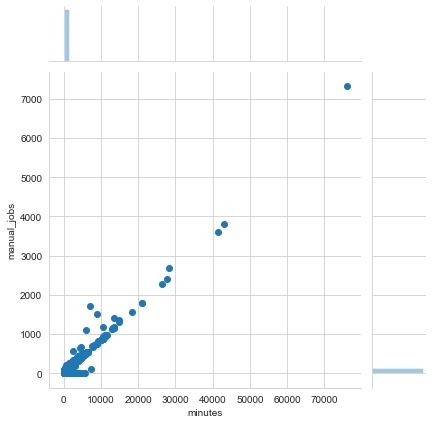

In [22]:
sns.jointplot(x='minutes', y='manual_jobs', data = df)

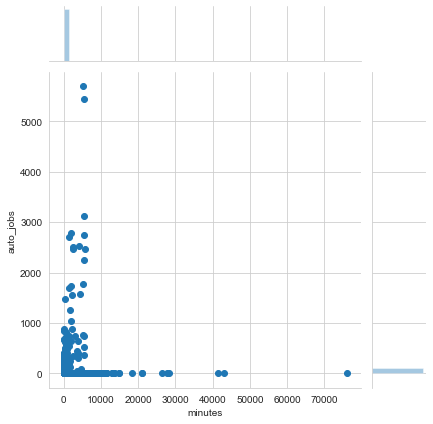

In [23]:
sns.jointplot(x='minutes', y='auto_jobs', data = df)

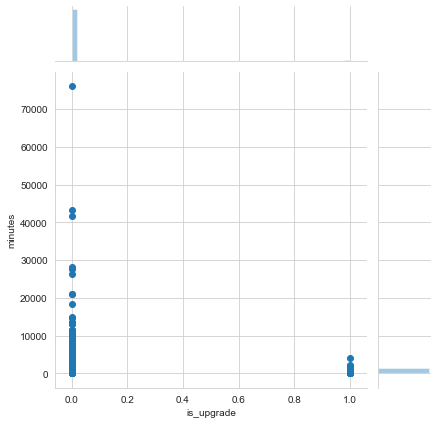

In [24]:
sns.jointplot(y='minutes',x='is_upgrade', data=df)

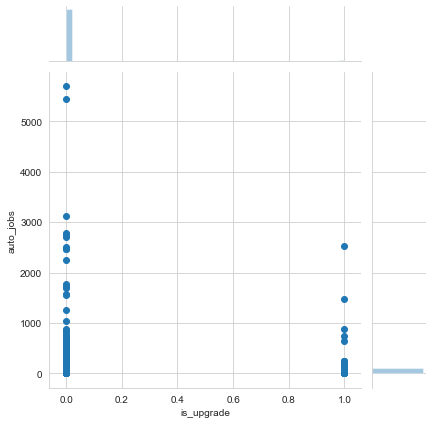

In [25]:
sns.jointplot(x='is_upgrade', y='auto_jobs', data=df)

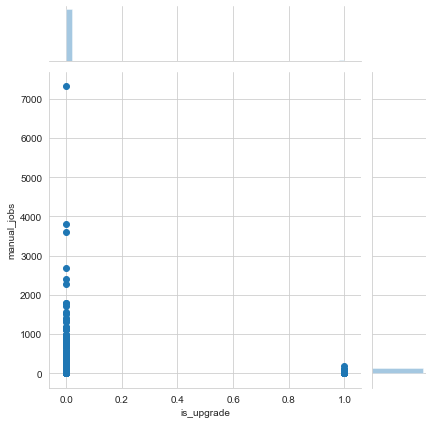

In [73]:
sns.jointplot(x='is_upgrade', y='manual_jobs', data=df)

In [81]:
# # Conclusion


In [ ]:
# Those with an interest in the product knew rather quickly that they woould be interested in purchasing the product.
# The rest would need the entire duration of the period to make their decision on whether they would be purchasing the product.

# Recommendation: Have Customer success follow up with those who have not made initial purchases

# Factors that contribute to user purchasing: Trial period and percentage of auto vs manual jobs

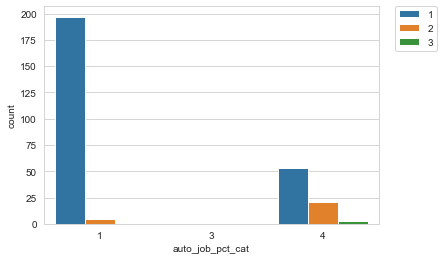

In [80]:
sns.countplot(x='auto_job_pct_cat',data=df[df['is_upgrade'] == 1], hue='trial_used_days_cat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

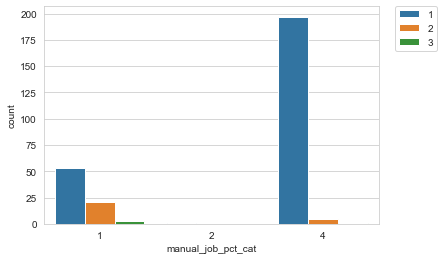

In [78]:
sns.countplot(x='manual_job_pct_cat',data=df[df['is_upgrade'] == 1], hue='trial_used_days_cat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


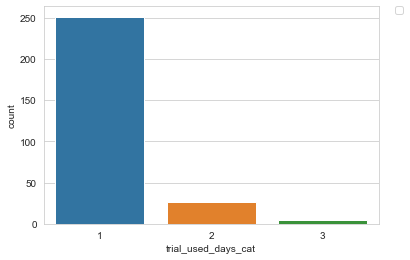

In [79]:
sns.countplot(x='trial_used_days_cat',data=df[df['is_upgrade'] == 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [27]:
df.columns

Index(['trial_start_time', 'trial_end_time', 'is_banned', 'is_upgrade',
       'upgrade_time', 'monthly_price', 'subscription_months', 'spam_score',
       'trial_used_days', 'job_count', 'manual_jobs', 'auto_jobs', 'minutes',
       'trial_period', 'trial_used_days_cat', 'auto_job_pct_cat'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df[['trial_used_days', 'manual_jobs', 'auto_jobs', 'minutes']]
y = df['is_upgrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7585    7]
 [  46   29]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7592
           1       0.81      0.39      0.52        75

    accuracy                           0.99      7667
   macro avg       0.90      0.69      0.76      7667
weighted avg       0.99      0.99      0.99      7667

